In [1]:
import os
os.getcwd()

'/home/vboxuser/ML'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv('Mall_Customers.csv')

In [7]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
#we need only 3 and 4 in x

In [9]:
x=data.iloc[:,3:]

In [10]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


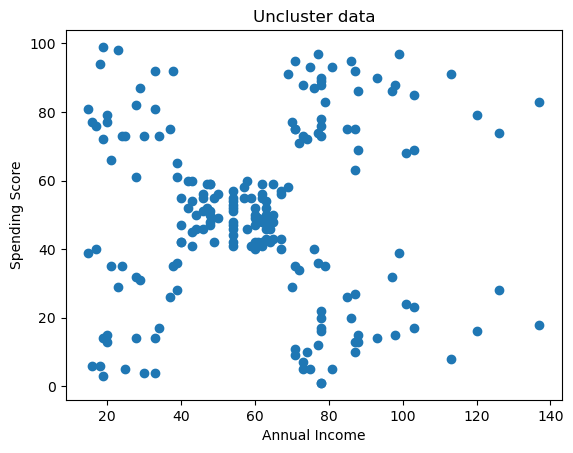

In [19]:
#Visualized Unclustered Data
plt.title('Uncluster data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

In [24]:
#To find ideal value of K

In [25]:
from sklearn.cluster import KMeans,AgglomerativeClustering

In [26]:
#Elbow method (finding SSE)

In [28]:
sse= []
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

/home/vboxuser/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vboxuser/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vboxuser/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vboxuser/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

In [29]:
sse

[269981.2800000001,
 182440.30762987013,
 106348.37306211118,
 73679.78903948836,
 44448.4554479337,
 37271.8862365895,
 30227.606513152015,
 24995.96978113596,
 21850.16528258563,
 19636.753964898155,
 17593.534034642104,
 16104.519126609825,
 14464.52441483248,
 12797.180630643867,
 11718.988629250007]

In [30]:
#plotting the (ELBOW )


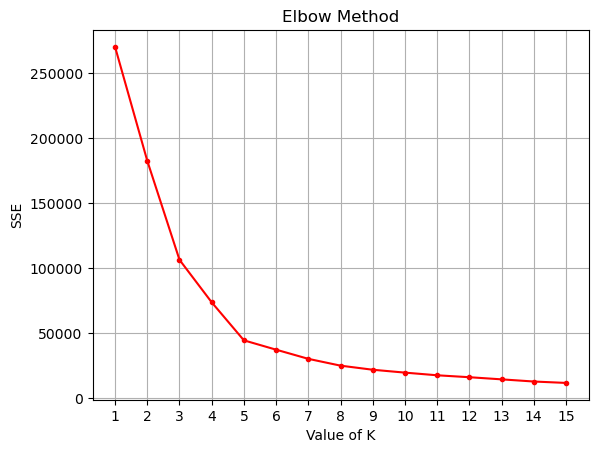

In [37]:
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker ='.',color='red')

In [41]:
#Silhoutte Score(Method)
from sklearn.metrics import silhouette_score

In [42]:
sil= []
for k in range(2,16):
    km = KMeans(n_clusters=k)
    labels=km.fit_predict(x)
    score=silhouette_score(x,labels)
    sil.append(score)

/home/vboxuser/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vboxuser/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vboxuser/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vboxuser/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

In [43]:
sil

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5393922132561455,
 0.4533280418148534,
 0.4581763522413715,
 0.4565077334305076,
 0.4563788792567468,
 0.4425484595570358,
 0.4263437487881259,
 0.41482106055395035,
 0.4159405115135603,
 0.41814634283310864]

<BarContainer object of 14 artists>

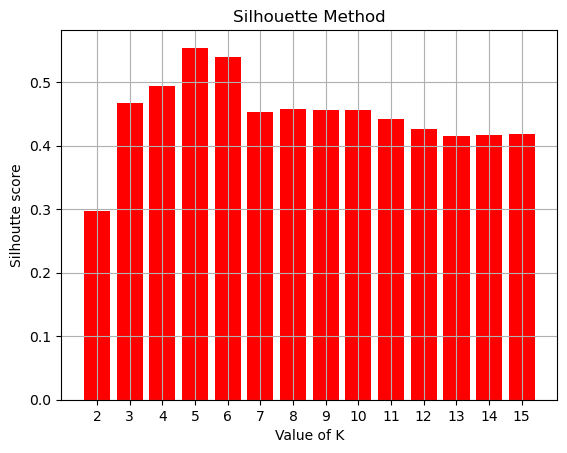

In [45]:
plt.title('Silhouette Method')
plt.xlabel('Value of K')
plt.ylabel('Silhoutte score')
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16), sil,color='red')

In [46]:
#to create Cluster
km=KMeans(n_clusters=5,random_state=0)

In [48]:
labels = km.fit_predict(x)

/home/vboxuser/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [58]:
#Centroids 
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

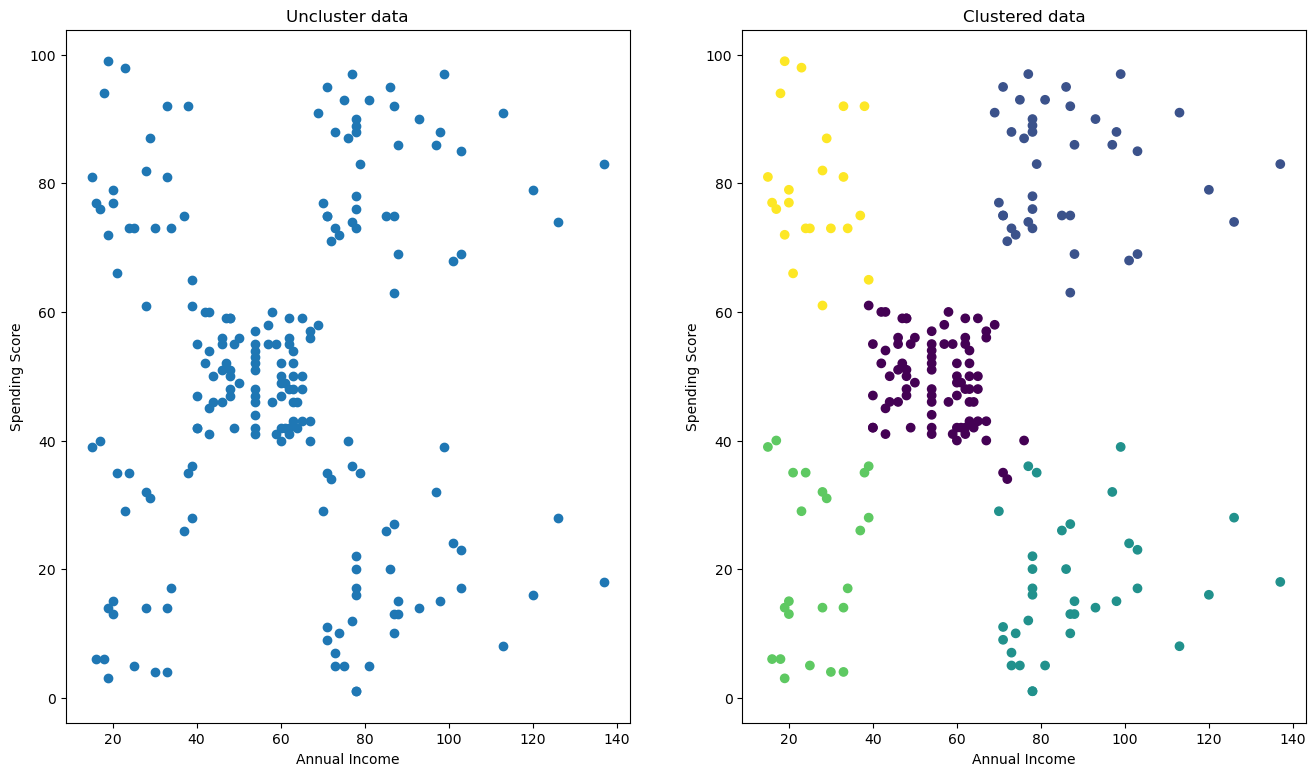

In [59]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Uncluster data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])

plt.subplot(1,2,2)
plt.title('Clustered data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)

In [60]:
#Agglomerative Clustering

In [62]:
agl=AgglomerativeClustering(n_clusters=5)

In [63]:
aglables=agl.fit_predict(x)

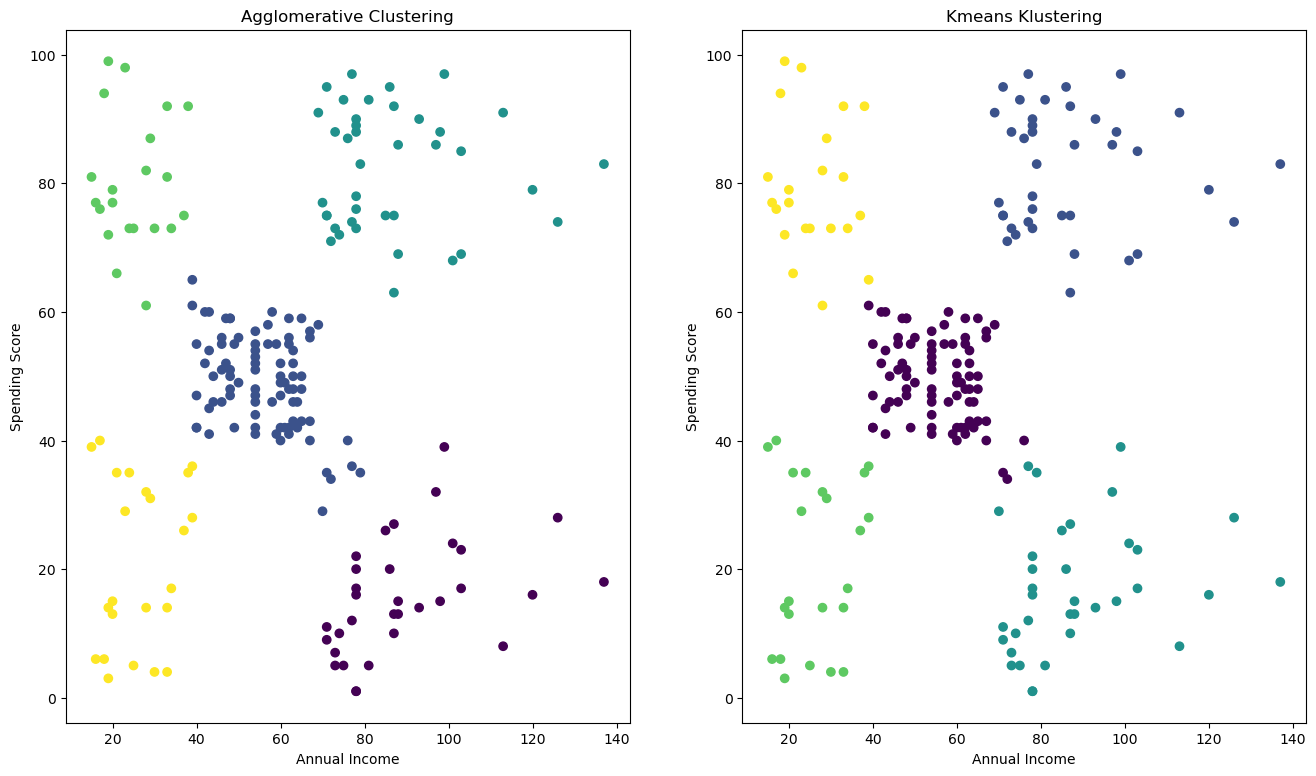

In [65]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=aglables)

plt.subplot(1,2,2)
plt.title('Kmeans Klustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels)